In [2]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import torch

torch.set_printoptions(edgeitems=2, linewidth=75)
torch.manual_seed(123)

## MNISTデータの取得

In [3]:
from torchvision import datasets

# torchvision = 0.7の場合
# datasets.MNIST.resources = [
#     ("https://azureopendatastorage.azurefd.net/mnist/train-images-idx3-ubyte.gz",
#         "f68b3c2dcbeaaa9fbdd348bbdeb94873"),
#     ("https://azureopendatastorage.azurefd.net/mnist/train-labels-idx1-ubyte.gz",
#         "d53e105ee54ea40749a09fcbcd1e9432"),
#     ("https://azureopendatastorage.azurefd.net/mnist/t10k-images-idx3-ubyte.gz",
#         "9fb629c4189551a2d022fa330f9573f3"),
#     ("https://azureopendatastorage.azurefd.net/mnist/t10k-labels-idx1-ubyte.gz",
#         "ec29112dd5afa0611ce80d1b7f02629c")
# ]

# torchvision 0.8?以降
datasets.MNIST.mirrors = [
    "https://azureopendatastorage.azurefd.net/mnist/"
]

# 誤ってv0.8以降でresourcesを書き換えてしまった場合の復元用
# datasets.MNIST.resources = [
#     ("train-images-idx3-ubyte.gz", "f68b3c2dcbeaaa9fbdd348bbdeb94873"),
#     ("train-labels-idx1-ubyte.gz", "d53e105ee54ea40749a09fcbcd1e9432"),
#     ("t10k-images-idx3-ubyte.gz", "9fb629c4189551a2d022fa330f9573f3"),
#     ("t10k-labels-idx1-ubyte.gz", "ec29112dd5afa0611ce80d1b7f02629c")
# ]
# 参考: https://pytorch.org/vision/stable/_modules/torchvision/datasets/mnist.html

mnist = datasets.MNIST('../data',
                            train=True,
                            download=True)
mnist_val = datasets.MNIST('../data', train=False, download=True)

In [4]:
len(mnist)

60000

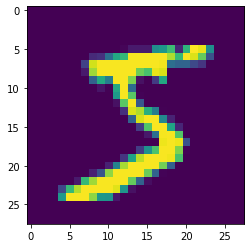

5
<PIL.Image.Image image mode=L size=28x28 at 0x7FF28ED3BC10>


In [28]:
img, label = mnist[0]

plt.imshow(img)
plt.show()

print(label)
print(img)

In [7]:
from torchvision import transforms
dir(transforms)

['CenterCrop',
 'ColorJitter',
 'Compose',
 'ConvertImageDtype',
 'FiveCrop',
 'Grayscale',
 'Lambda',
 'LinearTransformation',
 'Normalize',
 'PILToTensor',
 'Pad',
 'RandomAffine',
 'RandomApply',
 'RandomChoice',
 'RandomCrop',
 'RandomErasing',
 'RandomGrayscale',
 'RandomHorizontalFlip',
 'RandomOrder',
 'RandomPerspective',
 'RandomResizedCrop',
 'RandomRotation',
 'RandomSizedCrop',
 'RandomVerticalFlip',
 'Resize',
 'Scale',
 'TenCrop',
 'ToPILImage',
 'ToTensor',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'functional',
 'functional_pil',
 'functional_tensor',
 'transforms']

ToTensor()によってNumpy配列をPIL画像のテンソルに変換します。  
出力テンソルの順番は C x H x W (チャネル x 高さ x 幅)となります。

In [32]:
from torchvision import transforms

to_tensor = transforms.ToTensor()
img_t = to_tensor(img)
img_t.shape
# img_t

torch.Size([1, 28, 28])

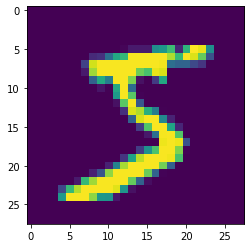

In [11]:
plt.imshow(img_t.permute(1,2,0))

## データの正規化

データセットを取得する段階でPyTorchテンソルに変換することが可能です。

In [14]:
tensor_mnist = datasets.MNIST('../data',
                            train=True,
                            download=True,
                            transform=transforms.ToTensor())

一つのテンソルにまとめます。

In [16]:
imgs = torch.stack([img_t for img_t, _ in tensor_mnist], dim=3)
imgs.shape

torch.Size([1, 28, 28, 60000])

In [21]:
imgs.view(1, -1).mean(dim=1) # 平均値

tensor([0.1307])

view(1, -2)により、最初の1つのチャネルを保持し、残りのすべての次元を一つに統合されます。
これで 1 x 28 x 28 の画像を 1 x 784 のベクトルに変換され、全画像の平均が計算されます。

標準偏差も同様です。

In [24]:
imgs.view(1, -1).std(dim=1) # 標準偏差

tensor([0.3081])

データセット取得時に、正規化の変換も行うようにします。

In [25]:
transformed_mnist = datasets.MNIST('../data',
                            train=True,
                            download=True,
                            transform=transforms.Compose(
                                [transforms.ToTensor(),
                                transforms.Normalize((0.1307, ), (0.3081, ))]))

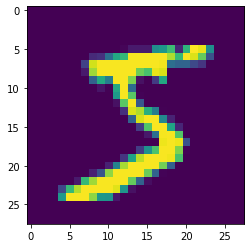

torch.Size([1, 28, 28])

In [35]:
img_t, _ = transformed_mnist[0]

plt.imshow(img_t.permute(1,2,0))
plt.show()
img_t.shape
# img_t